## Prediction of Whether the client has subscribed a term deposit or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
bank = pd.read_csv('bank-full.csv',sep = ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [4]:
bank.groupby('job').size()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

In [5]:
bank.info()  ## No Null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.describe()  ## Average age is 41 and avg balance is nearly 1400

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##### Dividing data into Numerical and categorical 

In [7]:
data = bank.copy()  ##  creating a copy of bank data
data = data.drop('duration',axis = 1)
## dropping 'duration' variable because this is highly influential on target variable 'y'


In [8]:
cols_num = ['age','balance','day','campaign', 'pdays',
       'previous']
data[cols_num].head()

,age,balance,day,campaign,pdays,previous
0,58,2143,5,1,-1,0
1,44,29,5,1,-1,0
2,33,2,5,1,-1,0
3,47,1506,5,1,-1,0
4,33,1,5,1,-1,0


In [9]:
cols_cat = ['job','education','marital','default','housing', 'loan', 'contact', 'month',
       'poutcome']
data[cols_cat].head()

,job,education,marital,default,housing,loan,contact,month,poutcome
0,management,tertiary,married,no,yes,no,unknown,may,unknown
1,technician,secondary,single,no,yes,no,unknown,may,unknown
2,entrepreneur,secondary,married,no,yes,yes,unknown,may,unknown
3,blue-collar,unknown,married,no,yes,no,unknown,may,unknown
4,unknown,unknown,single,no,no,no,unknown,may,unknown


## Graphical Representation of Numerical Data

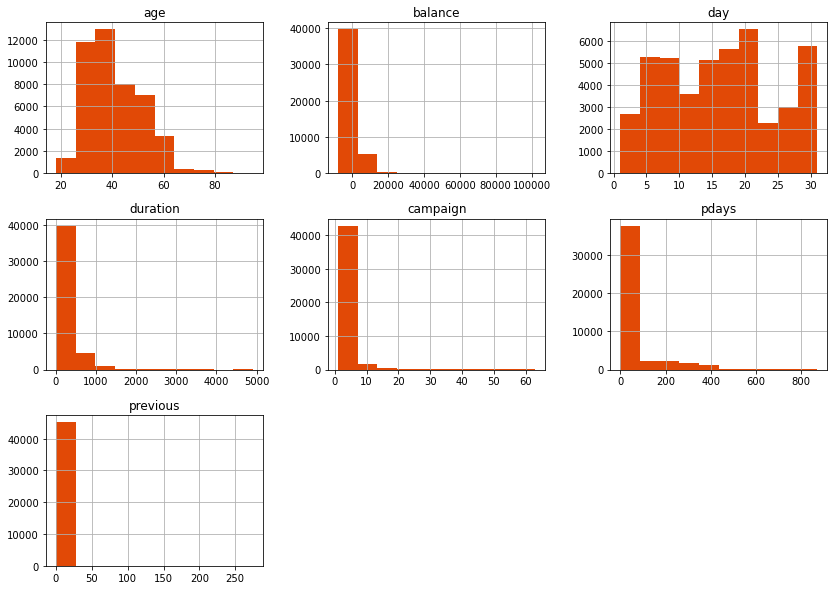

In [10]:
bank.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

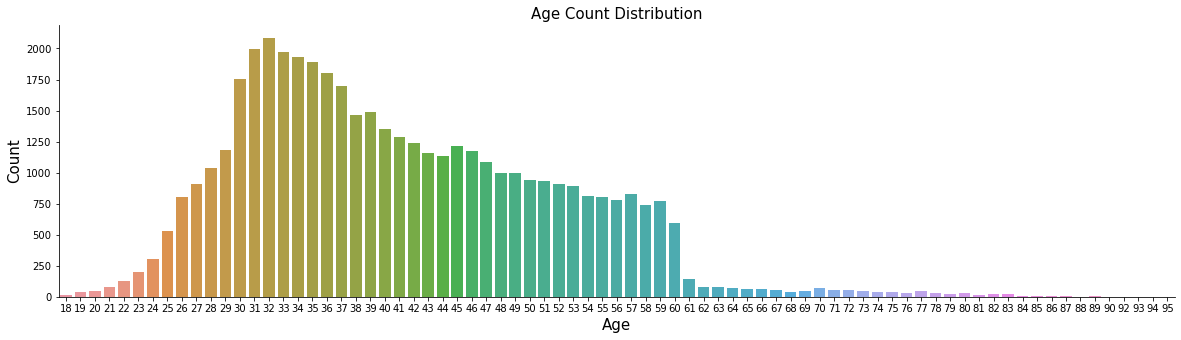

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'age', data =  data[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

<AxesSubplot:xlabel='day', ylabel='count'>

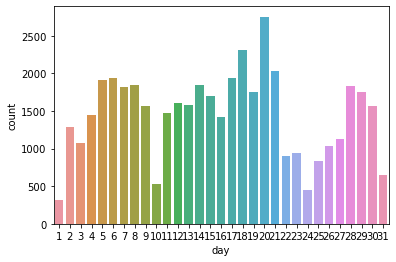

In [12]:
sns.countplot(x = 'day', data =  data[cols_num])
## data['day'].mean()

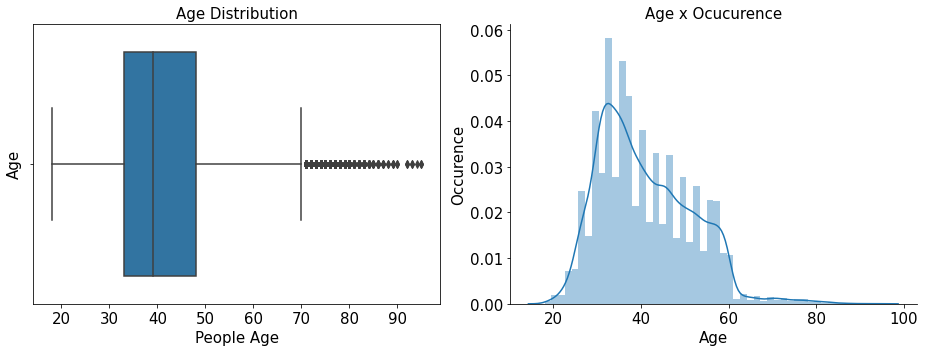

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

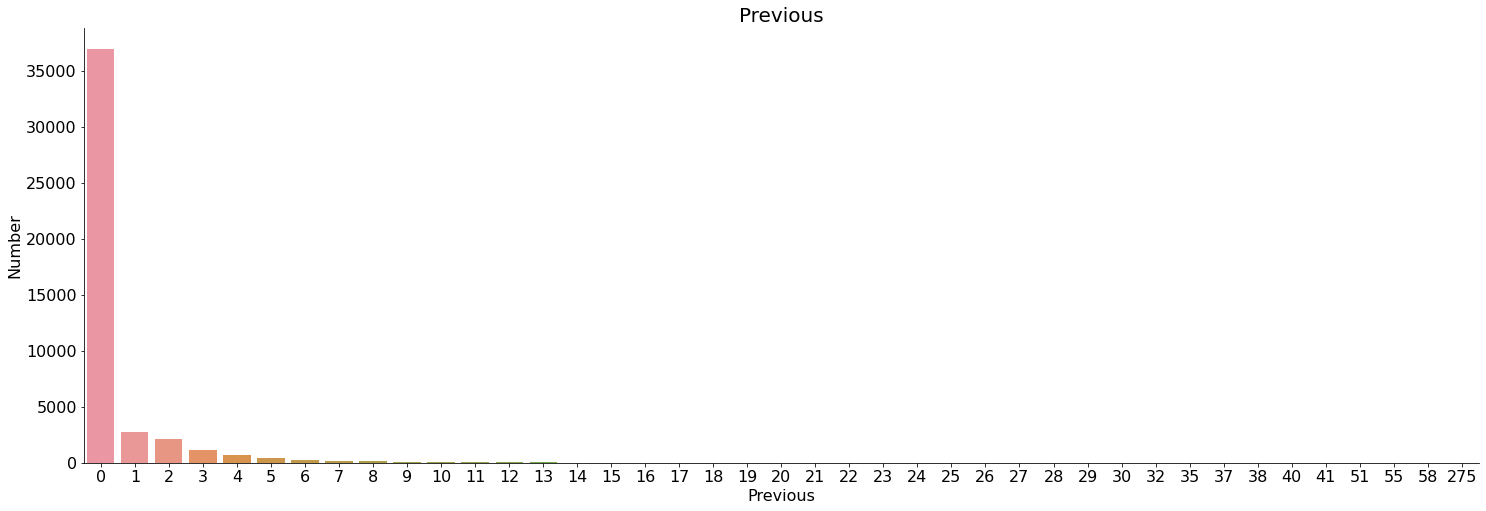

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = data[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()


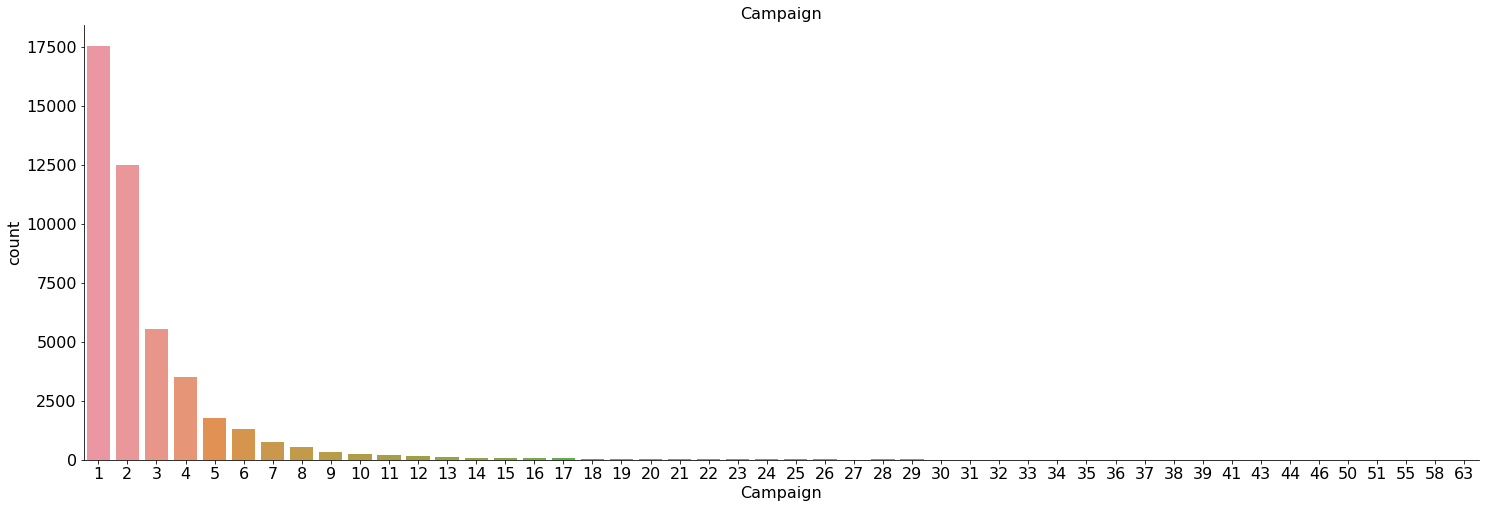

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'campaign', data = data[cols_num])

ax.set_xlabel('Campaign', fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.set_title('Campaign', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()



In [16]:
data[cols_num].isnull().sum()

age         0
balance     0
day         0
campaign    0
pdays       0
previous    0
dtype: int64

In [17]:
def standardize (x):
    z = (x-x.mean())/(x.std())
    return z
data = standardize(data[cols_num])

In [18]:
## Inferences drawn from graphical representation of Numerical data are:
# There are many outliers present in age variable
#  There are no null values

## One hot Encoding for categorical data

In [27]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'poutcome']
data[cols_cat]
cols_cat1=pd.get_dummies(data[cols_cat], drop_first = False)

cols_cat1.head()

KeyError: "None of [Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',\n       'month', 'poutcome'],\n      dtype='object')] are in the [columns]"

In [20]:
cols_cat1.columns

Index(['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital',
       'month', 'poutcome'],
      dtype='object')

## Graphical Representation of Categorical Variables


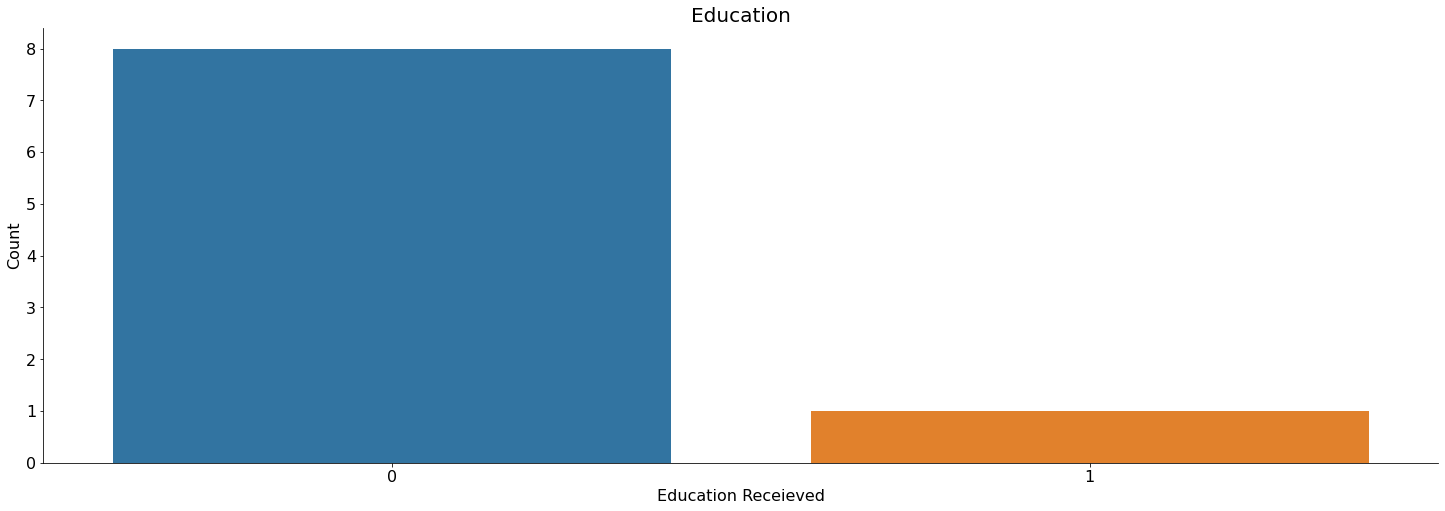

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = cols_cat1)
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

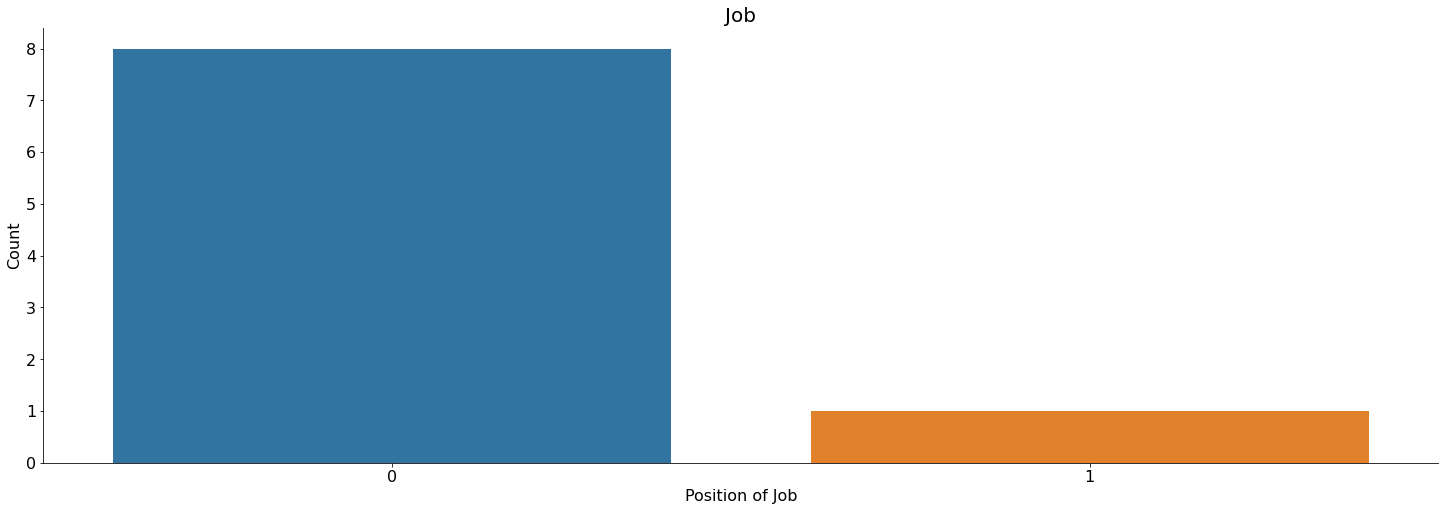

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = cols_cat1)
ax.set_xlabel('Position of Job', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Job', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

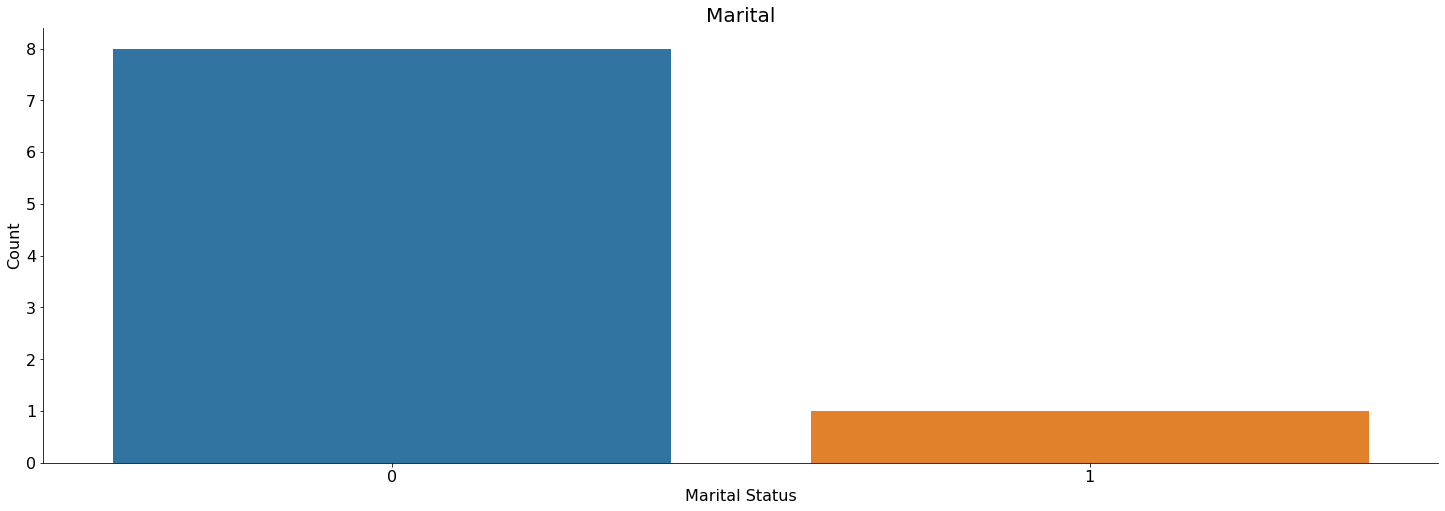

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = cols_cat1)
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

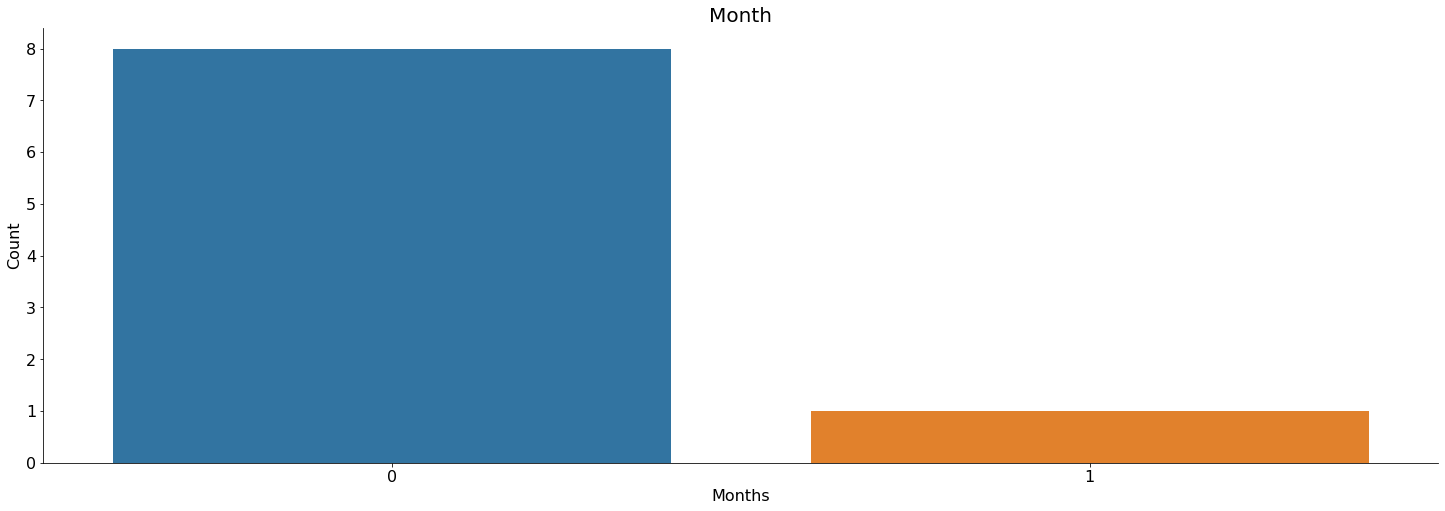

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'month', data = cols_cat1)
ax.set_xlabel('Months', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Month', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'contact', data = data[cols_cat])
ax.set_xlabel('Way of Contact', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Contact', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = data[cols_cat])
ax.set_xlabel('Outcome of Previous marketing campaing', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Previous marketing outcome', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(x = 'default', data = data[cols_cat], ax = ax1, order = ['no',  'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('Has credit or not')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=12)

sns.countplot(x = 'housing', data = data[cols_cat], ax = ax2, order = ['no',  'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('Has housing loan or not')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=12)

sns.countplot(x = 'loan', data =data[cols_cat], ax = ax3, order = ['no', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('Has personal loan or not')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.5)

In [ ]:
print (bank["default"].value_counts())

In [ ]:
print (bank["housing"].value_counts())
print (bank["loan"].value_counts())

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(data[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(data[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(data[cols_num]['day'], ax = ax3)
ax3.set_xlabel('Days', fontsize = 10)
ax3.set_title('Days')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [ ]:
data[cols_cat].mode()  ## mostly occured outcome for categorical features

In [ ]:
data[cols_num].mode()


In [ ]:
data1 = data.copy()

In [ ]:
data1 = pd.concat([data1,cols_cat1], axis = 1)
data1

In [ ]:
cols_all_cat=list(cols_cat1.columns)

data1[cols_all_cat].head()
data1.head()

### Summary of features

In [ ]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

In [ ]:
data1['output_var'] = (bank.y == 'yes').astype('int')
data1

In [ ]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [ ]:
print('prevalence of the positive class: %.3f'%calc_prevalence(data1['output_var'].values))

###### The prevlence of the positive class is 11.7% which means that the proportion of people who agreed to a term deposit (positive class) compared to the people who did not is 11.7%.

In [ ]:
cols_input = cols_num + cols_all_cat
bank_data = data1[cols_input + ['output_var']]
cols_input

In [ ]:
len(cols_input)

In [ ]:
bank_data.head()

In [ ]:
x = bank_data.iloc[:,:50]
x


In [ ]:
y = bank_data.iloc[:,50]
y

In [ ]:
help( LogisticRegression())

In [ ]:
## Logistic Regression and fit the model
classifier = LogisticRegression(penalty = 'none', random_state = 50, C = 0.5)
classifier.fit(x,y)

In [ ]:
## Predicting the x dataset
y_pred = classifier.predict(x)
y_pred

In [ ]:
y_pred_prob = classifier.predict_proba(x)
y_pred_prob

In [ ]:
y_pred_df = pd.DataFrame({'actual': y, 'predicted': y_pred, 'prob[0]': y_pred_prob[:,0],
                         'prob[1]': y_pred_prob[:,1]})
y_pred_df

In [ ]:
pd.crosstab(y_pred_df.actual, y_pred_df.predicted)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred_df.actual, y_pred_df.predicted)
accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
cm

##### In our problem 0 is client not subscribed the term deposit and 1 is client subscribed the term deposit
###### So in our problem False Negative is dangerous

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [ ]:
y_pred_df.predicted.value_counts()

In [ ]:
Sensitivity = TP/(TP+FN)
Specificity = TN/(FP+TN)
Precision_p = TP/(TP+FP)
Precision_n = TP/(TN+FN)

In [ ]:
print(Sensitivity,Specificity, Precision_p, Precision_n)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_df.actual, y_pred_df.predicted))

In [ ]:
## Roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

In [ ]:
df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'cutoff':thresholds})
df

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
auc = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr, color ='red', label='logit model(area = %0.2f)' %auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

In [ ]:
auc

In [ ]:
optimal_tpr = df[df['tpr']>=0.4]
optimal_tpr

In [ ]:
prob = classifier.predict_proba(x_train)
prob = prob[:,1]
new_pred = pd.DataFrame({'actual': y_train, 'pred': 0})
new_pred

In [ ]:
new_pred.loc[prob > 0.2,'pred'] = 1
new_pred

In [ ]:
cm_new = confusion_matrix(new_pred.actual, new_pred.pred)
cm_new

In [ ]:
pd.crosstab(new_pred.actual, new_pred.pred)

In [ ]:
print(classification_report(new_pred.actual, new_pred.pred))